# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *
from textblob import TextBlob


/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/kurapati/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
# We will import pandas and tabulate to use dataframe and do some pretty printing
import pandas as pd
from tabulate import tabulate

def P1(num_examples=5):
    """ Function to collect said number of example text and corresponding label"""
    for i in range(num_examples):
        example.append({'data':test_data[i],'label':newsgroups_train.target_names[test_labels[i]]})
    return example

example = list()
example = P1(5)
example_pd = pd.DataFrame(example)
print(tabulate(example_pd,headers=["Index","Text","Label Name"],tablefmt="fancy_grid"))

╒═════════╤═════════════════════════════════════════════════════════════════════════════════╤════════════════════╕
│   Index │ Text                                                                            │ Label Name         │
╞═════════╪═════════════════════════════════════════════════════════════════════════════════╪════════════════════╡
│       0 │ Just taking a guess, perhaps it was that Koresh had peaceably been served       │ talk.religion.misc │
│         │ with warrants before, and he did not shoot anyone but instead went with the     │                    │
│         │ police without fighting.                                                        │                    │
│         │ --                                                                              │                    │
│         │ "On the first day after Christmas my truelove served to me...  Leftover Turkey! │                    │
│         │ On the second day after Christmas my truelove served to me...  Turke

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [5]:
def P2(data):
    return(CountVectorizer().fit(data))

P2_fit = P2(train_data)
P2_transform = P2_fit.transform(train_data)

In [6]:
# Question 2a
# What is the size of the vocabulary? 
# What is the average number of non-zero features per example? 
# What fraction of the entries in the matrix are non-zero?

# Size of the vocabulary:
print("The size of the vocabulary is",len(P2_fit.vocabulary_))

# Average number of non-zero features per example
nnz_avg = P2_transform.nnz/P2_transform.shape[0]
print("The average number of non-zero features per example is ",nnz_avg)

# What fraction of the entries in the matrix are non-zero?
nnz_pct = (nnz_avg/P2_transform.shape[1])*100
print("Percentage of non-zero features per example is {}%".format(nnz_pct))

The size of the vocabulary is 26879
The average number of non-zero features per example is  96.70599803343165
Percentage of non-zero features per example is 0.3597827226959026%


In [7]:
# Question 2b
#What are the 0th and last feature strings (in alphabetical order)?
p2_features = sorted(P2_fit.get_feature_names())
print(p2_features[0])
print(p2_features[len(p2_features)-1])

00
zyxel


In [8]:
# Question 2c 
#Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. 
#Confirm the training vectors are appropriately shaped. 
#Now what's the average number of non-zero features per example?

MyVocab = ["atheism", "graphics", "space", "religion"]
P2c_fit = CountVectorizer(vocabulary=MyVocab).fit(train_data)
P2c_transform = P2c_fit.transform(train_data)

# Check the shape
print(P2c_transform.shape)

# Average number of non-zero features per example
nnz_avg = P2c_transform.nnz/P2c_transform.shape[0]
print("The average number of non-zero features per example is ",nnz_avg)

(2034, 4)
The average number of non-zero features per example is  0.26843657817109146


In [95]:
# Question 2d
# Instead of extracting unigram word features, use "analyzer" and "ngram_range" 
# to extract bigram and trigram character features. What size vocabulary does this yield?

# Here, we are using analyzer as 'char'. We could use 'word' as we well, and with word the vocabulary size increases.
P2d_fit = CountVectorizer(analyzer='char',ngram_range=(2,3)).fit(train_data)
P2d_transform = P2d_fit.transform(train_data)
print(P2d_transform.shape)
print("The size of the vocabulary is",len(P2d_fit.vocabulary_))

(2034, 35478)
The size of the vocabulary is 35478


In [10]:
# Question 2e
# Use the "min_df" argument to prune words that appear in fewer than 10 documents. 
# What size vocabulary does this yield?

P2e_fit = CountVectorizer(min_df=10).fit(train_data)
P2e_transform = P2e_fit.transform(train_data)
print(P2e_transform.shape)
print("The size of the vocabulary is",len(P2e_fit.vocabulary_))

(2034, 3064)
The size of the vocabulary is 3064


In [11]:
# Question 2f
# Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary?

P2f_fit = CountVectorizer().fit(dev_data)
P2f_transform = P2f_fit.transform(dev_data)
dev_vocab = len(set(P2f_fit.get_feature_names()))
train_vocab = len(set(P2_fit.get_feature_names()))

print("Size of Unique vocab of dev data is ",dev_vocab)
print("Size of Unique vocab of train data is ",train_vocab)

diff_vocab = set(P2f_fit.get_feature_names()).difference(set(P2_fit.get_feature_names()))
print("Number of Missing words: ",len(diff_vocab))
miss_pct = (len(diff_vocab)/dev_vocab)*100

print("Percentage of features missing in dev data is {}%".format(miss_pct))

Size of Unique vocab of dev data is  16246
Size of Unique vocab of train data is  26879
Number of Missing words:  4027
Percentage of features missing in dev data is 24.787640034470023%


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [89]:
# Let's transform the dev data using the CountVectorizer used for train data.
# We will reuse P2_fit variable that we got from Q2.

Dev_transform = P2_fit.transform(dev_data)

# Fit KNN classifier
p3_knn = KNeighborsClassifier(n_neighbors=1)
p3_knn.fit(P2_transform, train_labels)
pred_knn = p3_knn.predict(Dev_transform)
acc_score = np.mean(pred_knn==dev_labels)
print("Accuracy for KNN is: ",acc_score)
print("F1 Metrics for KNN with neighbor 1 is: ",metrics.f1_score(dev_labels,pred_knn,average='micro'))

Accuracy for KNN is:  0.383136094675
F1 Metrics for KNN with neighbor 1 is:  0.383136094675


In [88]:
# Perform GridSearchCV for optimal K-Value
knn=KNeighborsClassifier()
# Prepare a list of k values
# Here, we are taking values of k up to k=50 just for experiment. 

k=np.arange(50)+1
neighbors = {'n_neighbors': k}
knn_gscv = GridSearchCV(knn, param_grid = neighbors, refit=True)
knn_gscv.fit(P2_transform,train_labels)
print("The best parameter for number of neighbors is: ",knn_gscv.best_params_)
print("The best score is: ",knn_gscv.best_score_)


The best parameter for number of neighbors is:  {'n_neighbors': 48}
The best score is:  0.43215339233038347


In [91]:
# Fit MultinomialNB. We will reuse P2_transform that we used for CountVectorizer in Q2.

p3_mnb = MultinomialNB()
p3_mnb.fit(P2_transform, train_labels)
pred_mnb = p3_mnb.predict(Dev_transform)
acc_score = np.mean(pred_mnb==dev_labels)
print("Accuracy without adjusting alpha",acc_score)

# Find the best alpha
alphas = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
mnb_gscv = GridSearchCV(p3_mnb, param_grid = alphas, refit=True)
mnb_gscv.fit(P2_transform,train_labels)
print("The best parameter for alpha is: ",mnb_gscv.best_params_)
print("The best score is: ",mnb_gscv.best_score_)


Accuracy without adjusting alpha 0.781065088757
The best parameter for alpha is:  {'alpha': 0.01}
The best score is:  0.828416912487709


In [92]:
# Fit Logistic Regression
p3_lr = LogisticRegression()
p3_lr.fit(P2_transform, train_labels)
pred_lr = p3_lr.predict(Dev_transform)
acc_score = np.mean(pred_lr==dev_labels)
print("Accuracy without adjusting C",acc_score)
print("F1 metric prior to adjusting C",metrics.f1_score(dev_labels,pred_lr,average='micro'))

#find the optimal value for the regularization strength C

pipeline = Pipeline([('C', LogisticRegression())])
#print(pipeline.get_params().keys())

# Make a list of C values
C_val = {'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 10.0]}
lr_gscv = GridSearchCV(p3_lr, param_grid = C_val, refit=True)
lr_gscv.fit(P2_transform,train_labels)
print("The best parameter for C is: ",lr_gscv.best_params_)
print("The best score is: ",lr_gscv.best_score_)


Accuracy without adjusting C 0.701183431953
F1 metric prior to adjusting C 0.701183431953
The best parameter for C is:  {'C': 0.2}
The best score is:  0.7763028515240905


In [16]:
# Sum of the squared weight values for each class for each setting of the C parameter

def SSW(X):
    """ Defines sum of squared weights of a numpy array X"""
    ssq = np.sum(X**2)
    return(ssq)

# Make a list of C Values
C_List = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 10.0]

for C in C_List:
    print("\n Test for C Value: ",C)
    p3c_lr = LogisticRegression(C=C)
    p3c_lr.fit(P2_transform, train_labels)
    lr_coef = p3c_lr.coef_
    for i in range(4):
        ssq = SSW(lr_coef[i])
        print("Sum of squared weights for Class={} is {}".format(newsgroups_train.target_names[i],ssq))



 Test for C Value:  0.0001
Sum of squared weights for Class=alt.atheism is 0.007701749446752191
Sum of squared weights for Class=comp.graphics is 0.011941200310606642
Sum of squared weights for Class=sci.space is 0.00943507686563961
Sum of squared weights for Class=talk.religion.misc is 0.00910283529383201

 Test for C Value:  0.001
Sum of squared weights for Class=alt.atheism is 0.1650934516682228
Sum of squared weights for Class=comp.graphics is 0.20095274690582254
Sum of squared weights for Class=sci.space is 0.18067093754397093
Sum of squared weights for Class=talk.religion.misc is 0.18724278437849307

 Test for C Value:  0.01
Sum of squared weights for Class=alt.atheism is 2.5413958937236116
Sum of squared weights for Class=comp.graphics is 2.939709368356074
Sum of squared weights for Class=sci.space is 2.8624688447438755
Sum of squared weights for Class=talk.religion.misc is 2.2500286780851346

 Test for C Value:  0.1
Sum of squared weights for Class=alt.atheism is 27.1346536069

<font color=blue> ANSWER:

1. KNN does not perform well when the number of data points are very high and the distances are not varying. In this case, the distance between the neighbors of a given class are mostly similar (as is evident that increasing neighbors did not improve accuracy by much). KNN does not know which attribute is more important than the other and hence every attribute (even if it is an unimportant feature) has same influence on the accuracy. Lastly, KNN does not perform very well on missing features which is very common in text document. We need to follow methonds like average value for missing. All these factor into poor performance of KNN. A good amount of pre-processing that involves removing unimportant words, stemming etc may have helped a bit.

2. Refering to the paper by http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf Logistic Regression tend to perform better when the sample size reaches infinity (Larger data size), whereas generative models like Naive Bayes performs better for small to medium data sizes. In Bag-of-words model, NB works better because it figures out the probabilities based on prior occurences whereas Logistic Regression has a fixed functional model (Sigmoid) to calculate the probability. 

3. C is inverse of regularization. Smaller the C, stronger is the regularization that forces coefficients to be smaller. With higher C, we overfit the data thus increasing the sum of squared weights.
    

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [86]:
import itertools

# First let us try this for unigram 
p2_features = P2_fit.get_feature_names()

wList = list()
# Now, we iterate through each label and get the weights

for label in range(4):
    wListTemp = list()
    # Get the weight for the label into a pandas data frame
    weight_array = pd.DataFrame(p3_lr.coef_[label])
    # Create a column with index so that we maintain the index after sorting
    #weight_array['Index'] = weight_array.index
    weight_array.rename(columns={0:'weight'}, inplace=True)
    # Now sort the weights and grab top 5
    weight_array.sort_values(by=['weight'],inplace=True,ascending=False)
    wListTemp = weight_array.index[0:5].tolist()
    # Get the features from the collected indexes
    wList.append(list(map(lambda x: p2_features[x], wListTemp)))

# Flatten the list so that we have 20 features
merged_wList = list(itertools.chain.from_iterable(wList))
# Get the feature index value for these 20 features
feature_index_list = list(map(lambda x: p2_features.index(x), merged_wList))

# Now let us create 20x4 matrix where for each of the feature we display weight for each label

df = pd.DataFrame(merged_wList)
df.rename(columns={0:'Feature'},inplace=True)

for label in range(4):
    weight_per_label = list()
    w = p3_lr.coef_[label]
    for index in feature_index_list:
        weight_per_label.append(w[index])
    df[newsgroups_train.target_names[label]] = weight_per_label
        
df


,Feature,alt.atheism,comp.graphics,sci.space,talk.religion.misc
0,deletion,1.124717,-0.398504,-0.420089,-0.396201
1,atheists,1.030754,-0.097186,-0.319375,-0.834935
2,bobby,0.990070,-0.220664,-0.340931,-0.463187
3,religion,0.953787,-0.616858,-0.792994,-0.064485
4,atheism,0.939607,-0.410102,-0.449237,-0.434633
5,graphics,-0.758488,1.936698,-1.336687,-0.762335
6,image,-0.582780,1.345864,-0.825392,-0.469968
7,file,-0.334773,1.266233,-0.806512,-0.626206
8,3d,-0.358934,1.124860,-0.702615,-0.378560
9,computer,0.143833,0.977786,-0.682124,-0.486464


<font color=blue> The above table represents top 5 features w.r.to weight for each class. 0 to 4 are top 5 weighted features for atheism, 5 to 9 are top 5 weighted features for comp.graphics and so on.

In [87]:
# Repeat for Bigram

Bigram_fit = CountVectorizer(analyzer='word',ngram_range=(2,2)).fit(train_data)
Bigram_transform = Bigram_fit.transform(train_data)
Bigram_features = Bigram_fit.get_feature_names()

p4_lr = LogisticRegression()
p4_lr.fit(Bigram_transform, train_labels)

wList = list()
# Now, we iterate through each label and get the weights

for label in range(4):
    wListTemp = list()
    # Get the weight for the label into a pandas data frame
    weight_array = pd.DataFrame(p4_lr.coef_[label])
    # Create a column with index so that we maintain the index after sorting
    #weight_array['Index'] = weight_array.index
    weight_array.rename(columns={0:'weight'}, inplace=True)
    # Now sort the weights and grab top 5
    weight_array.sort_values(by=['weight'],inplace=True,ascending=False)
    wListTemp = weight_array.index[0:5].tolist()
    # Get the features from the collected indexes
    wList.append(list(map(lambda x: Bigram_features[x], wListTemp)))

# Flatten the list so that we have 20 features
merged_wList = list(itertools.chain.from_iterable(wList))
# Get the feature index value for these 20 features
feature_index_list = list(map(lambda x: Bigram_features.index(x), merged_wList))

# Now let us create 20x4 matrix where for each of the feature we display weight for each label

df2 = pd.DataFrame(merged_wList)
df2.rename(columns={0:'Feature'},inplace=True)

for label in range(4):
    weight_per_label = list()
    w = p4_lr.coef_[label]
    for index in feature_index_list:
        weight_per_label.append(w[index])
    df2[newsgroups_train.target_names[label]] = weight_per_label
        
df2

,Feature,alt.atheism,comp.graphics,sci.space,talk.religion.misc
0,claim that,0.771670,-0.257642,-0.352083,-0.200639
1,was just,0.677614,-0.192926,-0.197981,-0.301993
2,cheers kent,0.649128,-0.882377,-0.821939,0.601478
3,look up,0.633776,-0.238298,-0.195139,-0.170537
4,you are,0.569403,-0.318355,-0.577047,0.000911
5,looking for,-0.755578,1.319557,-0.613598,-0.699854
6,comp graphics,-0.379861,1.037286,-0.470828,-0.396632
7,in advance,-0.545011,0.972237,-0.531009,-0.507324
8,is there,-0.428480,0.912602,-0.568759,-0.341520
9,out there,-0.324277,0.896370,-0.577917,-0.332867


<font color=blue> ANSWER:

There are more surprises in Bigram than the Unigram. In Unigram, pretty much everything in top 5 seem to match their respective category, except for "FBI" under religion. In Bigram, only sci.space seem to be looking good for top 5 weights. For other classes there are very common word combinations that carry high weight. That tells us that we need to do proper preprocessing. 

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [93]:
# Download stemming, lemmatizing and stop words from NLTK
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
 
def my_preprocessor(message):
    ps = PorterStemmer()
    lm = WordNetLemmatizer()
    # Convert to lower case
    message = message.lower()
    # Remove special characters
    message = re.sub('[!:@#$%^&*().,?_]', ' ', message)
    # If more than 3 consecutive digits, replace it with 0
    regex = re.compile('[0-9]{3,}')
    message = regex.sub('0',message)
    # Shrink the size of long words to max of 5 characters
    message = ' '.join([x[:5] for x in message.split()])
    # Use Stemming and Lemmatizing of the words
    message = ps.stem(message)
    message = lm.lemmatize(message)
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    message_split = message.split()
    message = ' '.join([w for w in message_split if not w in stop_words])
    return(message)


cv_fit = CountVectorizer(analyzer='word').fit(train_data)
cv_transform = cv_fit.transform(train_data)

Dev_transform = cv_fit.transform(dev_data)

# Fit Logistic Regression. Using C=0.2 as it proved to be better in previous exercise
p4_lr = LogisticRegression(C=0.2)
p4_lr.fit(cv_transform, train_labels)
pred_lr = p4_lr.predict(Dev_transform)
print("F1 Metric before preprocess",metrics.f1_score(dev_labels,pred_lr,average='micro'))
print("Length of vocab before preprocess",len(cv_fit.vocabulary_))


# Now use different analyzer
cv_fit = CountVectorizer(preprocessor=my_preprocessor,analyzer='word').fit(train_data)
cv_transform = cv_fit.transform(train_data)
Dev_transform = cv_fit.transform(dev_data)
print("Length of vocab after preprocess",len(cv_fit.vocabulary_))

p4_lr = LogisticRegression(C=0.2)
p4_lr.fit(cv_transform, train_labels)
pred_lr = p4_lr.predict(Dev_transform)
print("F1 Metric after preprocess",metrics.f1_score(dev_labels,pred_lr,average='micro'))

F1 Metric before preprocess 0.713017751479
Length of vocab before preprocess 26879
Length of vocab after preprocess 15588
F1 Metric after preprocess 0.73224852071


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

In [20]:
#####
# Part 1:
# Train a logistic regression model using a "l1" penalty. 
# Output the number of learned weights that are not equal to zero. 
# How does this compare to the number of non-zero weights you get with "l2"?
#####

np.random.seed(0)

cv6_fit = CountVectorizer().fit(train_data)
cv6_transform = cv6_fit.transform(train_data)    

# Calculate number of non-zero weights with L1
lr6_l1 = LogisticRegression(penalty='l1')
lr6_l1.fit(cv6_transform, train_labels)
lr6_l1_coef = lr6_l1.coef_
print("Number of non-zero weights with L1 penalty: ",np.count_nonzero(lr6_l1_coef))

# Calculate number of non-zero weights with L2
lr6_l2 = LogisticRegression(penalty='l2',C=0.2)
lr6_l2.fit(cv6_transform, train_labels)
lr6_l2_coef = lr6_l2.coef_
print("Number of non-zero weights with L2 penalty: ",np.count_nonzero(lr6_l2_coef))


Number of non-zero weights with L1 penalty:  1609
Number of non-zero weights with L2 penalty:  107516


In [21]:
#####
# Part 2:
# Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight 
#####

# Store all the default vocab in a list #

default_vocab = cv6_fit.get_feature_names()

# Transpose the weights obtained from LR with L1 penalty.
# This gives us 26789x4 array. Each feature has 4 classes
l1_xpose_coef = np.transpose(lr6_l1_coef)

vocab_array = list()

# Loop through each feature, and check if at least one class has non-zero weight.
# If so, add it to the vocab

for l in range(len(l1_xpose_coef)):
    if np.count_nonzero(l1_xpose_coef[l]):
        vocab_array.append(default_vocab[l])

print("Length of the modified vocabulary is : ",len(vocab_array))

Length of the modified vocabulary is :  958


In [22]:
#####
# Part 3:
# Retrain a model using "l2" with modified vocabulary
#####

cv6_fit = CountVectorizer(vocabulary = vocab_array).fit(train_data)
cv6_transform = cv6_fit.transform(train_data) 
Dev_transform = cv6_fit.transform(dev_data) 

lr6_l2 = LogisticRegression(penalty='l2',C=0.2)
lr6_l2.fit(cv6_transform, train_labels)

# Predict the Dev data and find the accuracy of the retrained model

lr6_pred = lr6_l2.predict(Dev_transform)
print("Accuracy of the new model is :", np.mean(dev_labels == lr6_pred))
print("F1 score of the new model is :", metrics.f1_score(dev_labels, lr6_pred, average='micro'))


Accuracy of the new model is : 0.698224852071
F1 score of the new model is : 0.698224852071


[3, 18, 213, 366, 718, 1047, 2634, 7565, 23569]
[0.38165680473372782, 0.48668639053254437, 0.68934911242603547, 0.69082840236686394, 0.67603550295857984, 0.68639053254437865, 0.6849112426035503, 0.68047337278106512, 0.69674556213017746]


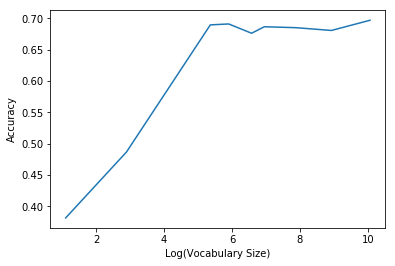

In [23]:
#####
# Part 4:
# Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get 
# when pruning unused features by adjusting the C parameter.
#####

C_Values = [0.001, 0.01, 0.1, 0.2, 0.5, 1, 10, 100, 1000]

# Let us create the default count vectorizer again
cv6_fit = CountVectorizer().fit(train_data)
cv6_transform = cv6_fit.transform(train_data) 
# Default vocabulary is stored here
default_vocab = cv6_fit.get_feature_names()

vocab_size_list = list()
accuracies_list = list()
vocab_size_nolog = list()
# We need to repeat the steps we did in part 2 and 3 in a loop for all C values.

for c_index in range(len(C_Values)):  
    lr6_l1 = LogisticRegression(penalty='l1',C=C_Values[c_index], tol=0.01)
    lr6_l1.fit(cv6_transform, train_labels)
    lr6_l1_coef = lr6_l1.coef_
    l1_xpose_coef = np.transpose(lr6_l1_coef)
    vocab_mod_list = list()
    for l in range(len(l1_xpose_coef)):
        if np.count_nonzero(l1_xpose_coef[l]):
            vocab_mod_list.append(default_vocab[l])
    
    vocab_size_list.append(np.log(len(vocab_mod_list)))
    vocab_size_nolog.append(len(vocab_mod_list))
    
    cv6_mod_fit = CountVectorizer(vocabulary = vocab_mod_list).fit(train_data)
    cv6_mod_transform = cv6_mod_fit.transform(train_data) 
    Dev_mod_transform = cv6_mod_fit.transform(dev_data) 

    lr6_l2 = LogisticRegression(penalty='l2',C=C_Values[c_index], tol=0.01)
    lr6_l2.fit(cv6_mod_transform, train_labels)

    # Predict the Dev data and find the accuracy of the retrained model

    lr6_pred = lr6_l2.predict(Dev_mod_transform)
    accuracies_list.append(np.mean(dev_labels == lr6_pred))

print(vocab_size_nolog)
print(accuracies_list)
plt.plot(vocab_size_list, accuracies_list)
plt.xlabel('Log(Vocabulary Size)')
plt.ylabel('Accuracy')
plt.show()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [24]:
# Step 1: First let us use TfidfVectorizer and fit it to Logististic Regression

# TFidfVectorizer
tf_fit = TfidfVectorizer().fit(train_data)
tf_transform = tf_fit.transform(train_data)
Dev_transform = tf_fit.transform(dev_data)

# Check the vocabulary with tfidf vectorizer
tf_vocab = tf_fit.vocabulary_
print("Size of vocab with tfidf vectorizer : ",len(tf_vocab))

# Use logistic regression with C=100
lr7 = LogisticRegression(C=100)
lr7.fit(tf_transform,train_labels)
lr7_pred = lr7.predict(Dev_transform)
print("Accuracy of the model is :", np.mean(dev_labels == lr7_pred))



Size of vocab with tfidf vectorizer :  26879
Accuracy of the model is : 0.763313609467


In [69]:
# Step 2: Get the R value for each example in the dev data and print top 3
    
# Get the predicted probability array
lr7_pred_prob = lr7.predict_proba(Dev_transform)

# Iterate every example and calculate R = max predicted prob/prob of correct label

R_List = list()

for i in range(len(dev_labels)):
    prob_list_i = lr7_pred_prob[i]
    max_prob = np.max(prob_list_i)
    true_class = dev_labels[i]
    true_prob = prob_list_i[true_class]
    R_List.append(max_prob/true_prob) 

# Sort the R_List. We will use pandas for ease of use
R_List_array = pd.DataFrame(R_List)
R_List_array.rename(columns={0:'R'},inplace=True)
R_List_array.sort_values(by=['R'],inplace=True,ascending=False)

Top3_Examples = list()
Top3_R = list()
Top3_Pred = list()
Top3_Actual = list()

# Preperation for printing top 3
for i in range(3):
    Index = R_List_array.index[i]
    Top3_R.append(R_List_array.R[Index])
    Top3_Examples.append(dev_data[Index])
    Top3_Pred.append(lr7_pred[Index])
    Top3_Actual.append(dev_labels[Index])
    #Top3_Pred.append(newsgroups_train.target_names[lr7_pred[Index]])
    #Top3_Actual.append(newsgroups_train.target_names[dev_labels[Index]])

df = pd.DataFrame(Top3_Examples)
df.rename(columns={0:'Text'},inplace=True)
df['R'] = Top3_R
df['Pred'] = Top3_Pred
df['Actual'] = Top3_Actual

print(tabulate(df,headers=["No","Text","R","Pred","Actual"],tablefmt="fancy_grid"))


╒══════╤═════════════════════════════════════════════════════════════════════════════╤═════════╤════════╤══════════╕
│   No │ Text                                                                        │       R │   Pred │   Actual │
╞══════╪═════════════════════════════════════════════════════════════════════════════╪═════════╪════════╪══════════╡
│    0 │ I am pleased to announce that a *revised version* of _The Easy-to-Read Book │ 929.358 │      1 │        3 │
│      │ of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now │         │        │          │
│      │ available through anonymous ftp (see information below). In addition to the │         │        │          │
│      │ change in title, the revised ETR BOM has been shortened by several pages    │         │        │          │
│      │ (eliminating many extraneous "that's" and "of's"), and many (minor) errors  │         │        │          │
│      │ have been corrected. This release includes a simplified

<font color=blue> ANSWER:
CountVectorizer by default does not adjust the weights of unimportant/frequently occuring features. Frequently occuring words (That shows up in every document) carry very little meaning. Hence, we had to do lot of pre-processing for improving the accuracy. Inverse document frequency (IDF) adjusts the weights of such words by penalizing them through normalization. The resulting TF-IDF vector of normalized feature weights improve the accuracy.

While it does help in re-adjusting the weights, by default TFIdf still does not remove stop words. Also, looking at the higher R values, it appears that the documents that are either too large or too small are not handled well. If we split the accuracies by categories, we might notice better performance for the categories whose lengths are neighther too small or too big. We should analyze the length of documents further and see how we can normalize them separately.


(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [83]:
# Let us just remove stop words and see if the accuracy improves

tf_fit = TfidfVectorizer(stop_words=set(stopwords.words('english')),analyzer='word').fit(train_data)
tf_transform = tf_fit.transform(train_data)
Dev_transform = tf_fit.transform(dev_data)

# Check the vocabulary with tfidf vectorizer
tf_vocab = tf_fit.vocabulary_
print("Size of vocab with tfidf vectorizer : ",len(tf_vocab))

# Use logistic regression with C=100
lr7 = LogisticRegression(C=100)
lr7.fit(tf_transform,train_labels)
lr7_pred = lr7.predict(Dev_transform)
print("Accuracy of the model is :", np.mean(dev_labels == lr7_pred))

Size of vocab with tfidf vectorizer :  26739
Accuracy of the model is : 0.775147928994


<font color=blue> Just by removing stopwords we are able to improve the 1.2 points which is a good sign. 